In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from gaia_spec import *

In [2]:
bps = lsst_filters()
bps.update(stubb_fitlers())

In [3]:
response = gaia_response(restore_file='gaia_response_nonoise.npz')

In [4]:
input_mag = 15
sed = Sed()
# Read in an SED that's solar-like, set to g=16, don't bother adding dust.
sed.read_close_SED(6000., 0., 4.4)
fNorm = sed.calcFluxNorm(input_mag, bps['g'])
sed.multiplyFluxNorm(fNorm)


Opening cache of LSST SEDs in:
/Users/yoachim/gitRepos/sims_photutils/cacheDir/lsst_sed_cache.p


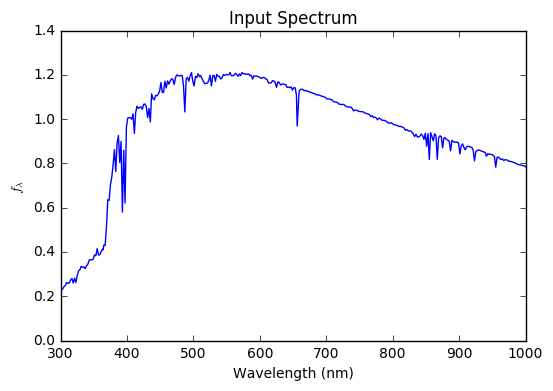

In [5]:
plt.plot(sed.wavelen, sed.flambda*5.03e8*sed.wavelen*100)
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'$f_\lambda$ ')
plt.xlim([300,1000])
plt.title('Input Spectrum')

In [6]:
workdir = 'plot_work'
gaia_observed = SED2GAIA(sed, workdir=workdir)


In [7]:
observed_sed = ulysses2SED(data=gaia_observed, response=response)
not_nan = ~np.isnan(observed_sed.flambda)
observed_sed.flambda = np.interp(observed_sed.wavelen, observed_sed.wavelen[not_nan],
                                             observed_sed.flambda[not_nan])

/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (306.64 to 1238.64) and sed FromArray (581.50 to 1238)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))
gaia_spec.py:174: RuntimeWarning: invalid value encountered in divide
  flambda = (red_sed.flambda*red_weight + blue_sed.flambda*blue_weight) / (red_weight + blue_weight)


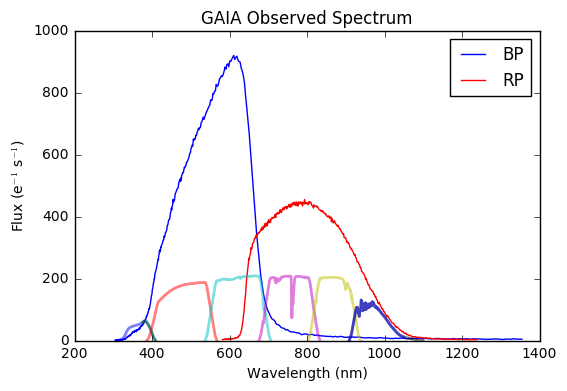

In [15]:
plt.plot(gaia_observed['BP_wave'], gaia_observed['noisySpec'][0]['BPNoisySpec'], 'b', label='BP')
plt.plot(gaia_observed['RP_wave'], gaia_observed['noisySpec'][0]['RPNoisySpec'], 'r', label='RP')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Flux (e$^{-1}$ s$^{-1}$)')
plt.title('GAIA Observed Spectrum')
for fn in filters:
    plt.plot(bps[fn].wavelen, bps[fn].sb*gaia_observed['noisySpec'][0]['BPNoisySpec'].max()*.5, alpha=.5, linewidth=2)
 

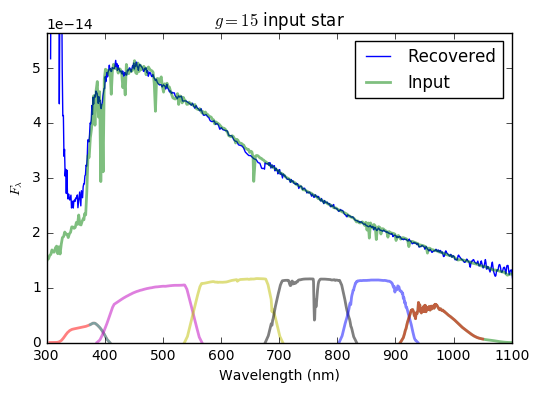

In [10]:
plt.plot(observed_sed.wavelen, observed_sed.flambda, label='Recovered')
plt.plot(sed.wavelen, sed.flambda, label='Input', linewidth=2, alpha=.5)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'$F_\lambda$')
plt.xlim([300,1100])
plt.title(r'$g=%.0f$ input star' % input_mag)
plt.ylim([0,sed.flambda.max()*1.1])
filters = ['u', 'u_truncated', 'g', 'r', 'i', 'z', 'y', 'y_truncated']
for fn in filters:
    plt.plot(bps[fn].wavelen, bps[fn].sb*sed.flambda.max()*.5, alpha=.5, linewidth=2)
    

In [11]:

print 'filter, input, recovered, diff (mmag)'
for fn in filters:
    inmag = sed.calcMag(bps[fn])
    outmag = observed_sed.calcMag(bps[fn])
    print '%s, %.2f, %.2f, %f' % (fn, inmag, outmag, (inmag-outmag)*1e3)

filter, input, recovered, diff (mmag)
u, 16.03, nan, nan
u_truncated, 15.60, 15.54, 56.000569
g, 15.00, 15.00, 4.904089
r, 14.70, 14.71, -9.676344
i, 14.62, 14.62, -0.680962
z, 14.61, 14.61, 0.260236
y, 14.61, 14.61, -0.142492
y_truncated, 14.60, 14.61, -0.326329


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (305.40 to 408.50) and sed FromArray (306.64 to 1239)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))
